In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])

Seven scientists problem -- from MacKay, 22.15

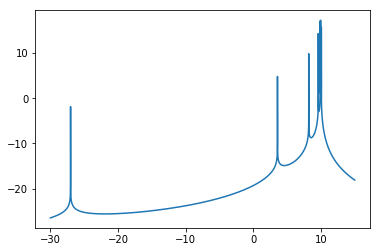

In [23]:
mu = np.arange(-30, 15, 0.00005)
loglike = -(np.log(np.abs(data[:, None] - mu)) + 1/2).sum(0)

plt.plot(mu, loglike)
plt.show()

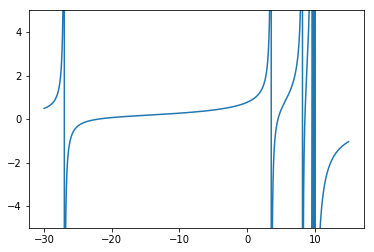

In [31]:
gradient = np.sum(1 / (data[:, None] - mu), 0)
plt.plot(mu, gradient)
plt.ylim(-5, 5)
plt.show()

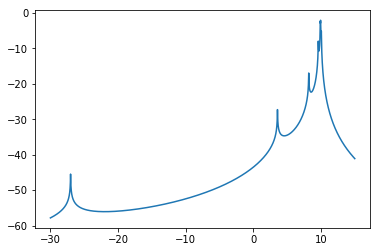

In [46]:
eps = 1e-2 # assume each scientist is only so accurate, so they have to generate a point on both sides.
# maybe we might as well just put zero prior probability on the sigmas being too small
# is this equivalent?

loglike = lambda mu: -(2*np.log(np.sqrt((data[:, None] + eps - mu)**2 + (data[:, None] - eps - mu)**2)) + 1).sum(0)

plt.plot(mu, loglike(mu))
plt.show()

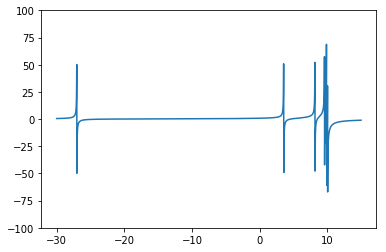

In [49]:
up, down = (data[:, None] + eps - mu), (data[:, None] - eps - mu)
gradient = np.sum((up + down) / (up**2 + down**2), 0)
plt.plot(mu, gradient)
plt.ylim(-100, 100)
plt.show()

This doesn't really help! why

Well, the real issue is not arbitrary accuracy, but more fundamental to the MLE selection process.

There is no "max likelihood" question we can ask, even with good priors.

We need to ask what is the expectation over the posterior of mu.

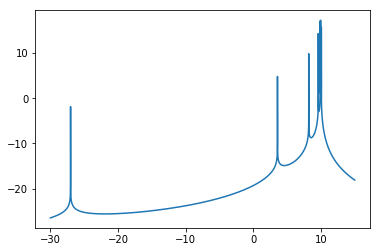

In [52]:
step = 0.00005
mu = np.arange(-30, 15, step)
loglike = lambda mu: -(np.log(np.abs(data[:, None] - mu)) + 1/2).sum(0)

plt.plot(mu, loglike(mu))
plt.show()

In [78]:
# let mu have a gaussian prior distribution, with generous mean=0, std=30. basically the same
logpriprob = mu**2/(2 * 30**2)
logpostprob = logpriprob + loglike(mu)

norm_logpostprob = logpostprob - np.log(np.sum(np.exp(logpostprob)))
est = np.sum(np.exp(norm_logpostprob) * mu)
print(est) # estimate of estimate

9.928079319833929
